In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3.1 

### 3.1.1 a

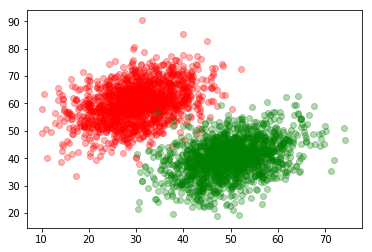

In [2]:
#generate two gaussian distributions
mean = [30, 60]
cov = [[50, 20], [20, 50]]  # covariance
x, y = np.random.multivariate_normal(mean, cov, 1500).T
plt.scatter(x, y, c = 'r', alpha = 0.3)
x1, y1= x, y

mean = [50, 40]
cov = [[50, 20], [20, 50]]  # covariance
x, y= np.random.multivariate_normal(mean, cov, 1500).T
x2, y2 = x, y
plt.scatter(x, y, c = 'g', alpha = 0.3)

(array([  1.,   1.,   0.,   1.,   3.,   0.,   1.,   7.,   6.,  12.,  14.,
         19.,  26.,  27.,  24.,  41.,  39.,  44.,  51.,  54.,  68.,  68.,
         66.,  74.,  90.,  76.,  81.,  80.,  83.,  64.,  56.,  59.,  41.,
         38.,  29.,  40.,  20.,  24.,  12.,  11.,  10.,   6.,   9.,   4.,
          7.,   5.,   2.,   3.,   1.,   2.]),
 array([  73.34567124,   75.46885053,   77.59202983,   79.71520913,
          81.83838842,   83.96156772,   86.08474702,   88.20792631,
          90.33110561,   92.45428491,   94.5774642 ,   96.7006435 ,
          98.8238228 ,  100.94700209,  103.07018139,  105.19336069,
         107.31653998,  109.43971928,  111.56289858,  113.68607787,
         115.80925717,  117.93243647,  120.05561576,  122.17879506,
         124.30197436,  126.42515365,  128.54833295,  130.67151225,
         132.79469154,  134.91787084,  137.04105014,  139.16422943,
         141.28740873,  143.41058803,  145.53376732,  147.65694662,
         149.78012592,  151.90330521,  154.026

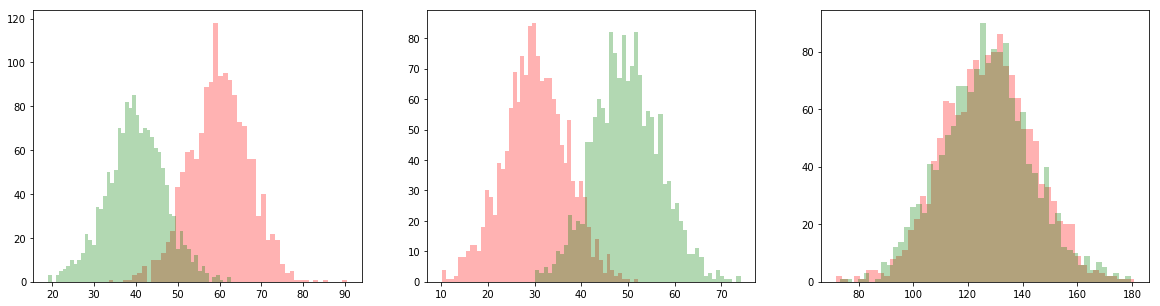

In [3]:
# project two ditributions
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
# w = (0 1)^T
ax[0].hist(y1, bins = 50,color = 'r', alpha = 0.3)
ax[0].hist(y2, bins = 50,color = 'g', alpha = 0.3)
# w = (1 0)^T
ax[1].hist(x1, bins = 50,color = 'r', alpha = 0.3)
ax[1].hist(x2, bins = 50,color = 'g', alpha = 0.3)
# w = (cos(pi/4) sin(pi/4))^T, in another word projection line is y = x
w = math.sqrt(2)
ax[2].hist((x1 + y1)*w, bins = 50, color = 'r', alpha = 0.3)
ax[2].hist((x2 + y2)*w, bins = 50, color = 'g', alpha = 0.3)

### 3.1.1  b

In [4]:
# define functions
def rotate(w1, w2, theta):
    w1_theta = math.cos(theta)*w1 - math.sin(theta)*w2
    w2_theta = math.sin(theta)*w1 + math.cos(theta)*w2
    w = np.mat([w1_theta, w2_theta]).T
    #print ('w is:', w)
    return w

def project_vector(w, x, y, n):
    x_project = []
    
    for i in range(n):
        #print (i)
        xi = x[i]
        yi = y[i]
        new_point = np.asarray(np.mat([xi, yi])*w*w.T)
        New_point = list(new_point)
        #print('newpoint is ',new_point, type(New_point))
        xn = float(new_point[:,0])
        yn = float(new_point[:,1])
        x_project.append(xn + yn)  #revised
    return x_project

def mu_sigma(y, n):
    mu = np.sum(y)/n
    sigma = np.sum((y - mu)**2)/n
    return mu, sigma

def fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = (na/(na + nb))*sigma_a + (nb/(na +nb))*sigma_b
    F = numerator/denominator
    return F

In [5]:
# I define w(0) = [1, 0]^T here
theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F = []
na = len(x1)
nb = len(x2)

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i)    
    x1_project = project_vector(w, x1, y1, na)
    x2_project = project_vector(w, x2, y2, nb)
    
    mu_a, sigma_a = mu_sigma(x1_project, na)
    mu_b, sigma_b = mu_sigma(x2_project, nb)
    F.append(fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, na, nb))
    
#     print(w,'theta is:',theta_i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F[i])
#     print('---------------------------------------------------')

F_max = np.max(F)
place = np.where(F == np.max(F))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# plot F ?????????

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum fisher ratio is:  25.9790257955  when theat equals to: [ 2.35180679]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 3.1.2 a

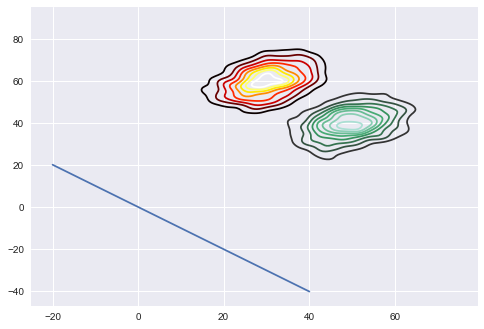

In [10]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)

### 3.1.2  b

(array([  1.,   0.,   3.,   0.,   1.,   6.,   3.,  12.,  11.,  14.,  19.,
         26.,  32.,  32.,  42.,  36.,  75.,  84.,  78.,  83.,  74.,  89.,
         86.,  91.,  78.,  72.,  81.,  69.,  66.,  50.,  37.,  48.,  23.,
         18.,  19.,   8.,  12.,   7.,   3.,   4.,   3.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.15564141, -0.15051483, -0.14538824, -0.14026166, -0.13513507,
        -0.13000848, -0.1248819 , -0.11975531, -0.11462872, -0.10950214,
        -0.10437555, -0.09924896, -0.09412238, -0.08899579, -0.0838692 ,
        -0.07874262, -0.07361603, -0.06848944, -0.06336286, -0.05823627,
        -0.05310968, -0.0479831 , -0.04285651, -0.03772992, -0.03260334,
        -0.02747675, -0.02235016, -0.01722358, -0.01209699, -0.0069704 ,
        -0.00184382,  0.00328277,  0.00840936,  0.01353594,  0.01866253,
         0.02378912,  0.0289157 ,  0.03404229,  0.03916888,  0.04429546,
         0.04942205,  0.05454864,  0.05967522,  0.06480181,  0.0699284 ,
 

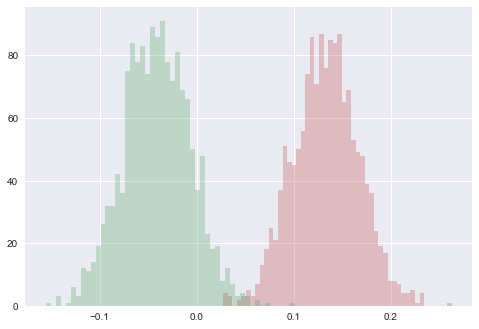

In [28]:
#use w from above, plot histogram of project 
w = rotate(w1, w2, Theta)
x1_project = project_vector(w, x1, y1, 1500)
x2_project = project_vector(w, x2, y2, 1500)
plt.hist(x1_project, bins = 50,color = 'r', alpha = 0.3)
plt.hist(x2_project, bins = 50,color = 'g', alpha = 0.3)
#sns.kdeplot(x1_project, color ='r') # kernel density estimator (kde)
#sns.kdeplot(x2_project, color ='g') # kde smooths histograms into pdfs



0.26226344489372977 -0.1556414149704075


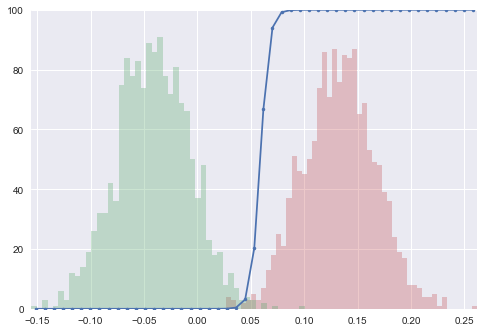

In [30]:

hist1 = plt.hist(x1_project, bins = 50, normed = 0, color = 'r', alpha = 0.3)
hist2 = plt.hist(x2_project, bins = 50, normed = 0, color = 'g', alpha = 0.3)


x_value = np.append(hist1[1], hist2[1], axis = 0)
x_max = float(np.max(x_value))
x_min = float(np.min(x_value))
print(x_max,x_min)

# take log ( ratio of probabilities of (y vs not-y) )
def logratio(a, b, eps=1e-14):  
    a=a+eps # to prevent taking logs of 0 or infinity
    b=b+eps # to prevent taking logs of 0 or infinity
    return np.log(a/b)

def sigmoid(x):
    return 1/(1+np.exp(-x))

binedge = np.linspace(x_min, x_max, 50) 
mid = np.mean((binedge[1:]-binedge[:-1])/2) 
x_grid = binedge[:-1] + mid

x1hist = np.histogram(x1_project, bins=binedge, density="True")
x2hist = np.histogram(x2_project, bins=binedge, density="True")
x1_hist = x1hist[0]
x2_hist = x2hist[0]

# print('x1_hist', x1_hist, 'x_grid', x_grid)
# print(x1hist[1],x2hist[1])
# print(binedge)


lodds=logratio(x1_hist, x2_hist, 1e-16) + \
        logratio(len(x1_project), len(x2_project))
lrfit=np.polyfit(x_grid, lodds, deg=1) # straight line fit

axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([0,100])
plt.plot(x_grid,100*sigmoid(lrfit[0]*x_grid+lrfit[1]),'b.-')

### 3.1.2 c

In [22]:
def unbalanced_fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = sigma_a + sigma_b
    F_unbalanced = numerator/denominator
    return F_unbalanced
# repeat what we`ve done in 3.1 b

theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F_unbalanced = []

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i) 
    x1_project = project_vector(w, x1, y1, 1500)
    x2_project = project_vector(w, x2, y2, 1500)
    
    mu_a, sigma_a = mu_sigma(x1_project, 1500)
    mu_b, sigma_b = mu_sigma(x2_project, 1500)
    F_unbalanced.append(unbalanced_fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, 1500, 1500))
    
#     print(w,'theta is:',theta_i,'i is: ', i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F_unbalanced[i])
#     print('---------------------------------------------------')

F_max = np.max(F_unbalanced)
place = np.where(F_unbalanced == np.max(F_unbalanced))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum unbalanced fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum unbalanced fisher ratio is:  12.9895128978  when theat equals to: [ 2.35180679]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


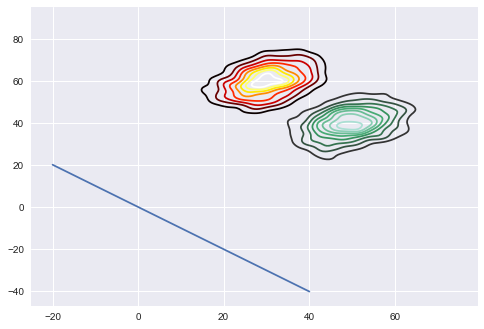

In [23]:
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)